In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_parquet('AQI_Historical_New')

In [3]:
df['dt'] = pd.to_datetime(df['dt'])

In [4]:
df = df.drop('main.aqi', axis=1)
#df = df.drop('coord.lat', axis=1)
#df = df.drop('coord.lon', axis=1)

In [6]:
df.head()

,dt,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord.lon,coord.lat,TRT_ID
0,2021-03-31 23:00:00,200.27,0.30,1.99,134.47,0.94,4.69,10.93,1.50,-111.9297,33.5032,20
1,2021-04-01 00:00:00,201.94,0.28,2.61,134.47,1.04,4.91,11.22,1.57,-111.9297,33.5032,20
2,2021-04-01 01:00:00,253.68,0.70,13.02,115.87,1.33,5.70,12.62,2.28,-111.9297,33.5032,20
3,2021-04-01 02:00:00,327.11,0.16,26.73,87.98,1.59,6.70,14.31,3.26,-111.9297,33.5032,20
4,2021-04-01 03:00:00,373.84,0.00,31.19,67.95,1.68,7.35,15.67,3.93,-111.9297,33.5032,20


In [5]:
df_mean = df.groupby('TRT_ID').resample('Y', on='dt').mean()

In [6]:
df_mean = df_mean.drop('TRT_ID', axis=1)

In [7]:
df_mean = df_mean.reset_index()

In [12]:
df_mean.head()

,TRT_ID,dt,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord.lon,coord.lat
0,20,2021-12-31,342.348113,3.654096,20.350139,71.505821,2.276391,11.152469,20.565576,2.548848,-111.9297,33.5032
1,20,2022-12-31,330.248767,3.846011,19.032457,71.631629,2.167050,10.130564,19.882678,2.412478,-111.9297,33.5032
2,22,2021-12-31,260.222059,1.140851,6.694113,60.319781,0.889029,5.900627,8.626298,0.679444,-122.5158,37.9320
3,22,2022-12-31,234.499701,0.924195,6.747207,58.936593,0.842213,5.624672,8.213307,0.739472,-122.5158,37.9320
4,24,2021-12-31,400.390829,6.854964,28.306849,67.846930,4.562691,18.665876,25.450587,1.495153,-118.6025,34.1911


In [8]:
df_2021 = df_mean[df_mean['dt'].dt.year == 2021]
df_2022 = df_mean[df_mean['dt'].dt.year == 2022]

In [9]:
lat, long = df_2021['coord.lat'], ['coord.lon']

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [19]:
df_2021.columns

Index(['TRT_ID', 'dt', 'components.co', 'components.no', 'components.no2',
       'components.o3', 'components.so2', 'components.pm2_5',
       'components.pm10', 'components.nh3'],
      dtype='object')

In [25]:
cluster_2021 = df_2021[['components.co', 'components.no', 'components.no2',
       'components.o3', 'components.so2', 'components.pm2_5',
       'components.pm10', 'components.nh3']]

In [26]:
cluster_2021 = StandardScaler().fit_transform(cluster_2021)

In [27]:
from sklearn.cluster import DBSCAN, OPTICS

dbscan_cluster_model = DBSCAN().fit(cluster_2021)
dbscan_cluster_model

DBSCAN()

In [28]:
print(set(dbscan_cluster_model.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -1}


In [29]:
df_2021['cluster'] = dbscan_cluster_model.labels_
df_2021

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_26112\410308688.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TRT_ID,dt,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord.lon,coord.lat,cluster
0,20,2021-12-31,342.348113,3.654096,20.350139,71.505821,2.276391,11.152469,20.565576,2.548848,-111.9297,33.5032,0
2,22,2021-12-31,260.222059,1.140851,6.694113,60.319781,0.889029,5.900627,8.626298,0.679444,-122.5158,37.9320,1
4,24,2021-12-31,400.390829,6.854964,28.306849,67.846930,4.562691,18.665876,25.450587,1.495153,-118.6025,34.1911,2
6,26,2021-12-31,362.484891,2.403384,22.220045,65.988672,3.184287,19.288624,28.764525,1.238043,-117.6691,33.5582,3
8,27,2021-12-31,403.548554,5.227264,24.051954,68.622282,3.533900,21.283985,31.305386,0.964377,-117.8729,33.6144,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,4005591,2021-12-31,323.561353,3.394272,19.396003,61.483363,4.708687,9.696257,13.614249,0.827843,-121.9679,38.0283,1
5378,4005608,2021-12-31,521.340810,22.990741,40.886739,39.823901,9.054769,17.311670,22.694313,2.816849,-74.0185,40.7897,15
5380,4005660,2021-12-31,265.579043,0.469154,6.598487,58.852423,0.568958,7.326964,11.601737,1.207720,-121.5795,36.8428,1
5382,4005667,2021-12-31,249.686148,0.249807,5.144519,59.847080,0.312568,4.022809,4.414384,0.590606,-116.7889,47.7701,1


In [30]:
import plotly.express as px

fig = px.scatter(x=df_2021['coord.lon'], y=df_2021['coord.lat'], color=df_2021['cluster'])

fig.show()

In [31]:
from sklearn.metrics import silhouette_score

silhouette_score(cluster_2021, df_2021['cluster'])

0.05851972660269158

In [32]:
epsilons = np.linspace(0.01,1,num=100)
min_samples = np.arange(2, 100, step=1)

In [33]:
import itertools
from tqdm import tqdm

combinations = list(itertools.product(epsilons,min_samples))

In [34]:
def get_scores_and_labels(combinations,X):
    scores = []
    all_labels_list = []

    for i, (eps,num_samples) in tqdm(enumerate(combinations)):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if (num_clusters < 2):
            scores.append(-10)
            all_labels_list.append('bad')
            continue

        scores.append(silhouette_score(X, labels))
        all_labels_list.append(labels)

    best_index = np.argmax(scores)
    best_params = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_params[0],
            'best_min_samples': best_params[1],
            'best_labels': best_labels,
            'best_score': best_score}

In [35]:
best_dict = get_scores_and_labels(combinations, cluster_2021)

9800it [21:46,  7.50it/s]


In [36]:
best_dict

{'best_epsilon': 0.16,
 'best_min_samples': 2,
 'best_labels': array([  0,   1,   2, ..., 242, 429,  36], dtype=int64),
 'best_score': 0.7066867443388916}

In [37]:
df_2021['cluster'] = best_dict['best_labels']

C:\Users\fashaikh\AppData\Local\Temp\ipykernel_26112\2446261640.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
fig = px.scatter(x=df_2021['coord.lon'], y=df_2021['coord.lat'], color=df_2021['cluster'])

fig.show()

lat lon dbscan

In [4]:
df = df.drop_duplicates(subset=['TRT_ID'])

In [27]:
lat_long = df[['coord.lat', 'coord.lon']]
lat, long = df['coord.lat'], df['coord.lon']

lat_long = StandardScaler().fit_transform(lat_long)

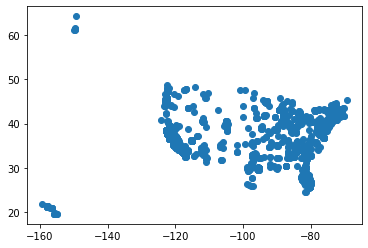

In [28]:
plt.scatter(long,lat)

In [29]:
from sklearn.cluster import DBSCAN, OPTICS

X = lat_long

dbscan_cluster_model = DBSCAN().fit(X)
dbscan_cluster_model

OPTICS(cluster_method='dbscan', eps=0.3)

In [30]:
print(set(dbscan_cluster_model.labels_))

{0, 1, 2, 3, 4, -1}


In [31]:
df['cluster'] = dbscan_cluster_model.labels_
df

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord.lon,coord.lat,TRT_ID,cluster
0,2021-03-31 23:00:00,3,200.27,0.30,1.99,134.47,0.94,4.69,10.93,1.50,-111.9297,33.5032,20,0
720,2021-03-31 23:00:00,3,223.64,0.62,4.37,154.50,4.05,7.82,10.16,1.68,-122.5158,37.9320,22,0
1440,2021-03-31 23:00:00,3,213.62,0.64,4.28,145.91,2.21,5.42,11.84,1.35,-118.6025,34.1911,24,0
2160,2021-03-31 23:00:00,3,257.02,0.95,7.20,163.08,2.62,10.15,15.97,1.60,-117.6691,33.5582,26,0
2880,2021-03-31 23:00:00,4,534.06,3.80,30.16,178.81,4.23,42.03,60.46,2.41,-117.8729,33.6144,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935360,2021-03-31 23:00:00,3,226.97,0.81,5.44,151.63,3.76,9.57,12.16,2.12,-121.9679,38.0283,4005591,0
1936080,2021-03-31 23:00:00,2,440.60,0.50,56.21,29.33,8.11,10.56,13.52,1.88,-74.0185,40.7897,4005608,0
1936800,2021-03-31 23:00:00,3,243.66,0.39,2.72,145.91,0.92,10.62,14.62,3.17,-121.5795,36.8428,4005660,0
1937520,2021-03-31 23:00:00,2,200.27,0.19,0.90,111.58,0.32,1.86,2.25,0.46,-116.7889,47.7701,4005667,2


In [32]:
import plotly.express as px

fig = px.scatter(x=long, y=lat, color=df['cluster'])

fig.show()

In [11]:
from sklearn.metrics import silhouette_score

silhouette_score(X, df['cluster'])

0.06551686084577259

In [12]:
epsilons = np.linspace(0.01,1,num=100)
epsilons

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [13]:
min_samples = np.arange(2, 100, step=1)

In [14]:
import itertools

combinations = list(itertools.product(epsilons,min_samples))

In [15]:
N = len(combinations)

In [16]:
from tqdm import tqdm

In [19]:
def get_scores_and_labels(combinations,X):
    scores = []
    all_labels_list = []

    for i, (eps,num_samples) in tqdm(enumerate(combinations)):
        dbscan_cluster_model = OPTICS(eps=eps, min_samples=num_samples, cluster_method='dbscan').fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if (num_clusters < 2):
            scores.append(-10)
            all_labels_list.append('bad')
            continue

        scores.append(silhouette_score(X, labels))
        all_labels_list.append(labels)

    best_index = np.argmax(scores)
    best_params = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_params[0],
            'best_min_samples': best_params[1],
            'best_labels': best_labels,
            'best_score': best_score}

In [20]:
best_dict = get_scores_and_labels(combinations, X)

23it [00:24,  1.05s/it]


KeyboardInterrupt: 

In [50]:
best_dict

{'best_epsilon': 0.43,
 'best_min_samples': 28,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.6336073463890821}

In [49]:
print(best_dict['best_labels'])

[0 0 0 ... 0 0 0]


In [47]:
df['cluster'] = best_dict['best_labels']

In [48]:
fig = px.scatter(x=long, y=lat, color=df['cluster'])
fig.show()